## Setup

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import os 
import shutil

## Police Data Cleaning

In [2]:
df = pd.read_csv('Mapping Police Violence-Grid view.csv')
mpv = df[['cause_of_death','race','date','officer_charged','allegedly_armed']]
#renaming "allegedly_armed" to "armed"
mpv = mpv.rename(columns={'allegedly_armed': 'armed'})
mpv

,cause_of_death,race,date,officer_charged,armed
0,NaN,Black,3/14/2022,NaN,Allegedly Armed
1,NaN,White,3/12/2022,NaN,Allegedly Armed
2,Gunshot,White,3/12/2022,No Known Charges,Allegedly Armed
3,Gunshot,NaN,3/12/2022,No Known Charges,Allegedly Armed
4,Gunshot,White,3/11/2022,No Known Charges,Allegedly Armed
...,...,...,...,...,...
10070,Gunshot,Hispanic,1/1/2013,No Known Charges,Unclear
10071,Gunshot,Black,1/1/2013,No Known Charges,Allegedly Armed
10072,Gunshot,White,1/1/2013,No Known Charges,Allegedly Armed
10073,Gunshot,Hispanic,1/1/2013,No Known Charges,Allegedly Armed


In [3]:
# Converting 'date' column into datatype 'pandas Timestamp'

mpv['date'] = pd.to_datetime(mpv['date'], infer_datetime_format=True)
mpv

,cause_of_death,race,date,officer_charged,armed
0,NaN,Black,2022-03-14,NaN,Allegedly Armed
1,NaN,White,2022-03-12,NaN,Allegedly Armed
2,Gunshot,White,2022-03-12,No Known Charges,Allegedly Armed
3,Gunshot,NaN,2022-03-12,No Known Charges,Allegedly Armed
4,Gunshot,White,2022-03-11,No Known Charges,Allegedly Armed
...,...,...,...,...,...
10070,Gunshot,Hispanic,2013-01-01,No Known Charges,Unclear
10071,Gunshot,Black,2013-01-01,No Known Charges,Allegedly Armed
10072,Gunshot,White,2013-01-01,No Known Charges,Allegedly Armed
10073,Gunshot,Hispanic,2013-01-01,No Known Charges,Allegedly Armed


In [4]:
type(mpv['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# Removing incidents occuring after 2020-09 as we do not have tweets after that period\n",
cutoff_date = pd.Timestamp(2020, 10, 1)

mpv = mpv[mpv.date < cutoff_date]

# Setting date as index
mpv.set_index('date')

,cause_of_death,race,officer_charged,armed
date,,,,
2020-09-30,Gunshot,White,No Known Charges,Allegedly Armed
2020-09-30,Gunshot,Black,No Known Charges,Unclear
2020-09-29,Gunshot,Unknown race,No Known Charges,Allegedly Armed
2020-09-28,Gunshot,Black,No Known Charges,Allegedly Armed
2020-09-28,Gunshot,Hispanic,No Known Charges,Allegedly Armed
...,...,...,...,...
2013-01-01,Gunshot,Hispanic,No Known Charges,Unclear
2013-01-01,Gunshot,Black,No Known Charges,Allegedly Armed
2013-01-01,Gunshot,White,No Known Charges,Allegedly Armed


In [6]:
print(mpv['race'].unique())
print(mpv['cause_of_death'].unique())
print(mpv['armed'].unique())

['White' 'Black' 'Unknown race' 'Hispanic' 'Asian' 'Native American' nan
 'Pacific Islander']
['Gunshot' 'Gunshot,Taser' 'Taser' 'Vehicle' 'Physical Restraint'
 'Chemical Agent' 'Beaten' 'Other' 'Bean bag' 'Pepper Spray' 'Asphyxiated'
 'Bomb' 'Taser,Physical Restraint' nan 'Gunshot,Vehicle']
['Allegedly Armed' 'Unclear' 'Unarmed/Did Not Have Actual Weapon'
 'Vehicle' nan]


In [7]:
mpv['armed'].value_counts()

Allegedly Armed                       5987
Unarmed/Did Not Have Actual Weapon    1177
Unclear                                741
Vehicle                                567
Name: armed, dtype: int64

In [8]:
mpv['cause_of_death'].value_counts()
#proportion of gunshot vs taser, assign to gunshot then

Gunshot                     7815
Taser                        273
Gunshot,Taser                247
Vehicle                       44
Physical Restraint            34
Beaten                        32
Asphyxiated                    9
Other                          5
Pepper Spray                   5
Bean bag                       2
Taser,Physical Restraint       2
Chemical Agent                 1
Bomb                           1
Gunshot,Vehicle                1
Name: cause_of_death, dtype: int64

In [9]:
print(mpv['officer_charged'].unique())

['No Known Charges' '"Charged, Charges Dropped"' 'Charged with a crime'
 nan '"Charged, Convicted, Sentenced to 22.5 years in prison"'
 '"Charged, Convicted"'
 '"Charged, Convicted, Sentenced to life in prison"'
 '"Charged, Convicted, Sentenced to 10 years in prison"'
 '"Charged, Convicted, Sentenced to 7 years in prison"'
 '"Charged, Acquitted"'
 '"Charged, Plead Guilty to Voluntary Manslaughter"'
 '"Charged, Convicted, Sentenced to 1 year in prison and 4 years probation"'
 '"Charged, Convicted, Sentenced to 25 years in prison"'
 '"Charged, Convicted, Sentenced to 2 years suspension and 3 years probation"'
 '"Charged, Convicted, Sentenced to 5-15 years in prison"'
 '"Charged, Convicted, Sentenced to 4.75 years in prison"'
 '"Charged, Mistrial"'
 '"Charged, Convicted, Sentenced to 15 years in prison"'
 '"Charged, Plead No Contest, Sentenced to 10 years probation"'
 '"Charged, Convicted, Sentenced to 6 years in prison"'
 '"Charged, Convicted, Sentenced to 10 Years of Prison"'
 '"Charged

In [10]:
#cleaning "officer_charged"

mpv['officer_charged'] = mpv['officer_charged'].astype(str)

mpv.loc[mpv['officer_charged'].str.contains('Charged') == True, "officer_charged"] = "Charged"
mpv.loc[mpv['officer_charged'] == 'No Known Charges', 'officer_charged'] = "Not Charged"
mpv.loc[mpv['officer_charged'] == 'nan', 'officer_charged'] = "Unknown"
mpv

C:\Users\Krishiv\AppData\Local\Temp\ipykernel_4732\3156799842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpv['officer_charged'] = mpv['officer_charged'].astype(str)


,cause_of_death,race,date,officer_charged,armed
1602,Gunshot,White,2020-09-30,Not Charged,Allegedly Armed
1603,Gunshot,Black,2020-09-30,Not Charged,Unclear
1604,Gunshot,Unknown race,2020-09-29,Not Charged,Allegedly Armed
1605,Gunshot,Black,2020-09-28,Not Charged,Allegedly Armed
1606,Gunshot,Hispanic,2020-09-28,Not Charged,Allegedly Armed
...,...,...,...,...,...
10070,Gunshot,Hispanic,2013-01-01,Not Charged,Unclear
10071,Gunshot,Black,2013-01-01,Not Charged,Allegedly Armed
10072,Gunshot,White,2013-01-01,Not Charged,Allegedly Armed
10073,Gunshot,Hispanic,2013-01-01,Not Charged,Allegedly Armed


In [11]:
print(mpv['officer_charged'].unique())
type(mpv['officer_charged'].iloc[0])

['Not Charged' 'Charged' 'Unknown']


str

In [12]:
print(mpv['officer_charged'].unique())

['Not Charged' 'Charged' 'Unknown']


In [13]:
mpv.dtypes
#probably nan

cause_of_death             object
race                       object
date               datetime64[ns]
officer_charged            object
armed                      object
dtype: object

In [14]:
#why the heck is it object and not int

## Variables

### Cause of Death

Variable name: cause_of_death

Data type: string

Lists cause of death of police victims. Includes: NaN, gunshot, vehicle, taser, beaten, physical restraint, chemical agent, bean bag, pepper spray, asphyxiated, bomb, or multiple causes.

### Victim's Race

Variable name: race

Data type: string

Race of police victim, includes NaN, Black, White, Hispanic, Non-white, Unknown race, Pacific Islander, Native American, or Asian

### Date of Encounter

Variable name: date

Data type: pandas Timestamp

Dates from 1/1/2013 to 10/1/2020 (MM/DD/YY)

### Officer Charged

Variable name: officer_charged

Data type: string

Whether or not the police officer responsible for violence any criminal or civil charges.

### Victim Armed

Variable name (in original date): allegedly_armed

Variable name (in our data): armed

Data type: int

Whether or not victim was armed.
If unarmed (0), armed (1), unclear (3) otherwise (NaN).

## EDA

### Overview

### Officer Charged

We can start by looking at the data in the Officer Charged column to see some general statistics. Since the data is categorical, numerical analysis within this column is limited.

In [15]:
mpv['officer_charged'].value_counts()

Not Charged    8311
Charged         160
Unknown           2
Name: officer_charged, dtype: int64

As we can see, the officers were only charged in 160 cases, which is only 1.88% of all cases. Officers did not face any charges in 8311 cases, which represents 98.12% of cases.

We can look at the breakdown of when officers were charged grouped by the race of the victim:

In [16]:
# Temporarily adding a count column to help in making the pivot table. This will be dropped later.
mpv['count'] = 1
oc_by_race = mpv.groupby(['officer_charged', 'race']).count()
oc_by_race

C:\Users\Krishiv\AppData\Local\Temp\ipykernel_4732\836422928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpv['count'] = 1


cause_of_death  date  armed  count
officer_charged race                                                
Charged         Asian                          2     2      2      2
                Black                         73    73     73     73
                Hispanic                      18    18     18     18
                Native American                3     3      3      3
                Pacific Islander               2     2      2      2
                White                         62    62     62     62
Not Charged     Asian                        131   131    131    131
                Black                       2080  2080   2080   2080
                Hispanic                    1512  1513   1513   1513
                Native American              117   117    117    117
                Pacific Islander              47    47     47     47
                Unknown race                 713   713    713    713
                White                       3709  3710   3710   3710
Unknown         Black                          1     1      1      1

In [17]:
obr_pvt_table = oc_by_race.pivot_table(index=['race'], columns='officer_charged', values='count', fill_value=0, aggfunc=np.sum)
obr_pvt_table['Prop. Charged'] = 100 * obr_pvt_table['Charged'] / (obr_pvt_table['Charged'] + obr_pvt_table['Not Charged'] + obr_pvt_table['Unknown'])
obr_pvt_table

officer_charged,Charged,Not Charged,Unknown,Prop. Charged
race,,,,
Asian,2,131,0,1.503759
Black,73,2080,1,3.389044
Hispanic,18,1513,0,1.175702
Native American,3,117,0,2.500000
Pacific Islander,2,47,0,4.081633
Unknown race,0,713,0,0.000000
White,62,3710,0,1.643690


We can graph this data in a stacked bar chart:

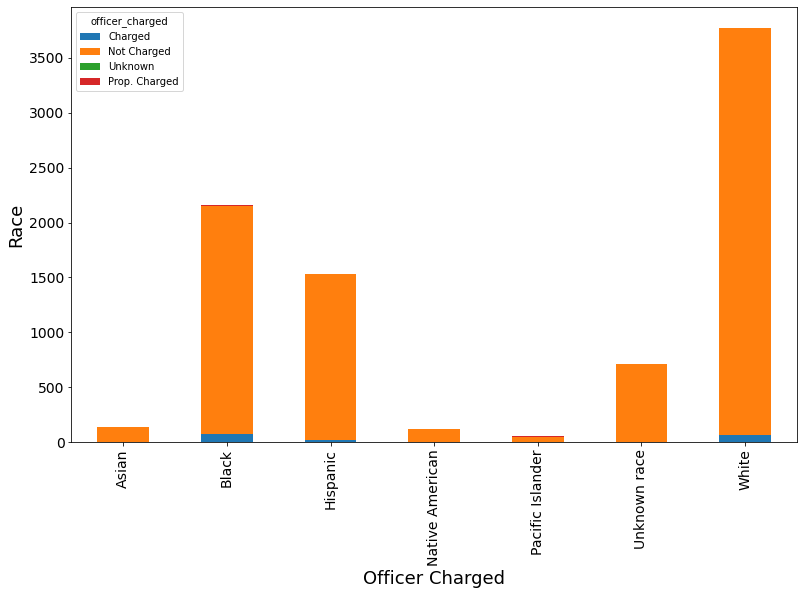

In [18]:
obr_pvt_table.plot.bar(figsize=(13,8), stacked=True)

plt.ylabel('Race', fontsize=18)
plt.xlabel('Officer Charged', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
# Not very useful due to small quantities

In [19]:
# if 'count' in mpv.columns:
#     mpv.drop('count', axis=1, inplace=True)

We can also see how the proportion of of cases in which officers were charged has changed over time.

In [20]:
# Temporarily adding a count column to help in making the pivot table. This will be dropped later.
mpv['year'] = pd.DatetimeIndex(mpv['date']).year

oc_by_time = mpv.groupby(['officer_charged', 'year']).count()
oc_by_time

C:\Users\Krishiv\AppData\Local\Temp\ipykernel_4732\3292282179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpv['year'] = pd.DatetimeIndex(mpv['date']).year


cause_of_death  race  date  armed  count
officer_charged year                                          
Charged         2013              19    19    19     19     19
                2014              19    19    19     19     19
                2015              25    25    25     25     25
                2016              20    20    20     20     20
                2017              19    19    19     19     19
                2018              16    16    16     16     16
                2019              26    26    26     26     26
                2020              16    16    16     16     16
Not Charged     2013            1068  1068  1068   1068   1068
                2014            1029  1029  1029   1029   1029
                2015            1075  1077  1077   1077   1077
                2016            1050  1050  1050   1050   1050
                2017            1073  1073  1073   1073   1073
                2018            1128  1128  1128   1128   1128
                2019            1070  1070  1070   1070   1070
                2020             816   816   816    816    816
Unknown         2014               1     1     1      1      1
                2020               1     0     1      0      1

In [21]:
obt_pvt_table = oc_by_time.pivot_table(index=['year'], columns='officer_charged', values='count', fill_value=0, aggfunc=np.sum)
obt_pvt_table['Prop. Charged'] = 100 * obt_pvt_table['Charged'] / (obt_pvt_table['Charged'] + obt_pvt_table['Not Charged'] + obt_pvt_table['Unknown'])
obt_pvt_table

officer_charged,Charged,Not Charged,Unknown,Prop. Charged
year,,,,
2013,19,1068,0,1.747930
2014,19,1029,1,1.811249
2015,25,1077,0,2.268603
2016,20,1050,0,1.869159
2017,19,1073,0,1.739927
2018,16,1128,0,1.398601
2019,26,1070,0,2.372263
2020,16,816,1,1.920768


Graphing this data to see any trends in the proportion of officers being charged over time:

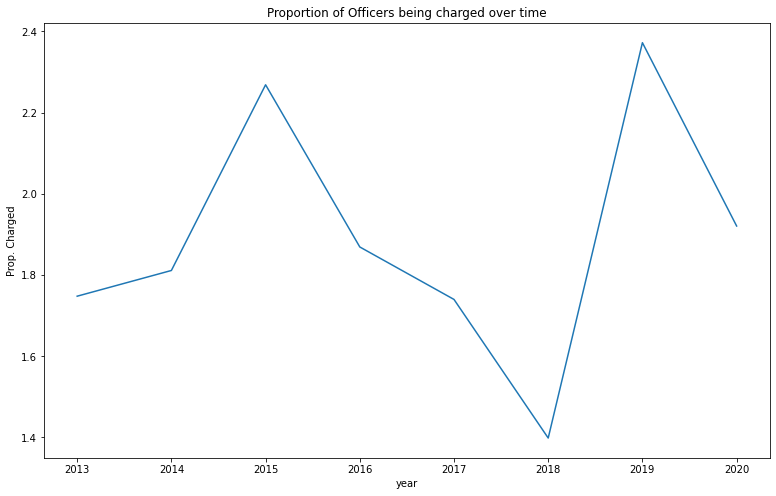

In [27]:
plt.figure(figsize=(13, 8))

prop_charged_vs_time = sns.lineplot(
    data=obt_pvt_table,
    x='year',
    y="Prop. Charged",
    ).set(title = "Proportion of Officers being charged over time")

## Twitter Data

We need to combine the multiple csv folders of tweet ids into one big one to then randomlly select tweets to hydrate.

In [22]:
def flatten(directory):
    for dirpath, _, filenames in os.walk(directory, topdown=False):
        for filename in filenames:
            i = 0
            source = os.path.join(dirpath, filename)
            target = os.path.join(directory, filename)

            while os.path.exists(target):
                i += 1
                file_parts = os.path.splitext(os.path.basename(filename))

                target = os.path.join(
                    directory,
                    file_parts[0] + "_" + str(i) + file_parts[1],
                )

            shutil.move(source, target)

            print("Moved ", source, " to ", target)

        if dirpath != directory:
            os.rmdir(dirpath)

            print("Deleted ", dirpath)

#credit to: https://amitd.co/code/python/flatten-a-directory

In [23]:
flatten(os.path.dirname("/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/twitter"))

Flattened all folders to make combining into one CSV easier.

In [24]:
tweets_path = "/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/"
file_list = [tweets_path + f for f in os.listdir(tweets_path)]
csv_list = []

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/'

In [ ]:
for file in sorted(file_list):
    csv_list.append(pd.read_csv(file).assign(File_Name = os.path.basename(file)))

csv_merged = pd.concat(csv_list, ignore_index=True)
csv_merged.to_csv(tweets_path + 'tweets_full.csv', index=False)

Tweet IDs successfully merged into one big CSV ready to be permutated.

In [ ]:
tweets = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_full.csv')
tweets.head()

In [ ]:
tweets_sample = tweets.sample(n = 2000000)
tweets_sample.head()

Randomly selected 2,000,000 tweet IDs. Now, we need to export back to CSV file with just the IDs to hydrate the tweets.

In [ ]:
tweets_sample_id = tweets_sample['status_id']

In [ ]:
tweets_sample_id.to_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_sample_id.csv', header=False, index=False)

Now that we have the tweets, let's go over the variables in the dataframe. 

The creators of the dataset categorized each tweet as supporting one of three major movements: Black Lives Matter, All Lives Matter, and Blue Lives Matter. The tweets are one hot encoded. 

The used an assortment of keywords and hashtags, as shown below, to categorize the tweets. These terms have a weight. The weight indicates how unique a term is to the topic. So a "1.0" tells us this term showed up only in that topic.

In [ ]:
alm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/alm50.csv')
alm = alm[['term', 'weight']]
alm.sort_values(by=['weight'],ascending=False)
alm.loc[alm['weight'] == 1.0]

In [ ]:
blm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/blm100.csv')
blm = blm[['term', 'weight']]
blm.head()
blm.loc[blm['weight'] == 1.0]

In [ ]:
blulm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/blulm25.csv')
blulm = blulm[['term', 'weight']]
blulm.head()
blulm.loc[blulm['weight'] == 1.0]